In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

fileroot = 'C:/Users/MarkoU/Documents/_Msc/11. Dissertation/Analysis_Data/'
techf     = fileroot + 'Killchain Techniques Across Years.csv'

In [170]:
# Extract the details we want
kc = pd.read_csv(techf)
#kc.head()

# Analysis of Techniques in Killchain Phases, across years

*The three most targeted phases*
- Cmd & Ctrl
- Defence Evasion
- Discovery

In [147]:
kc4 = kc
techs   = kc4.set_index('Killchain')
techs.head()

,Technique,2018,2019,2020,2021
Killchain,,,,,
Cmd & Ctrl,Ingress Tool Transfer,7,18,19,25
Discovery,Process Discovery,7,11,13,20
Cmd & Ctrl,Web Protocols,0,0,11,19
Discovery,System Network Configuration Discovery,3,8,9,18
Discovery,System Information Discovery,5,12,13,17


In [174]:
# Format the datasets ready for plotting
# .sort_values(['FromType','KcOrder'], ascending=True)

# Inject \n into long Technique names
kc4 = kc4.replace('Deobfuscate/Decode Files or Information', 'Deobfuscate/Decode \nFiles or Information')
kc4 = kc4.replace('Match Legitimate Name or Location', 'Match Legitimate \nName or Location')
kc4 = kc4.replace('Dynamic-link Library Injection','Dynamic-link \nLibrary Injection')

c2c   = kc4[kc4['Killchain'] == 'Cmd & Ctrl'     ].drop(['Killchain'], axis=1).set_index('Technique')
disc  = kc4[kc4['Killchain'] == 'Discovery'      ].drop(['Killchain'], axis=1).set_index('Technique')
defn  = kc4[kc4['Killchain'] == 'Defense Evasion'].drop(['Killchain'], axis=1).set_index('Technique')

if (1 == 0):
    # It's better to show all than to filter for top(n) 
    c2c   = c2c.sort_values(['2021'],  ascending=False).head(4)
    disc  = disc.sort_values(['2021'], ascending=False).head(6)
    defn  = defn.sort_values(['2021'], ascending=False).head(2)
    
#c2c.count()
#len(defn.index)
defn #.head()

,2018,2019,2020,2021
Technique,,,,
Deobfuscate/Decode \nFiles or Information,1,3,4,12
Match Legitimate \nName or Location,0,0,3,10
Disable or Modify Tools,0,0,5,7
Dynamic-link \nLibrary Injection,0,0,5,7
Software Packing,0,0,4,7
Process Injection,3,7,2,6


# All three together

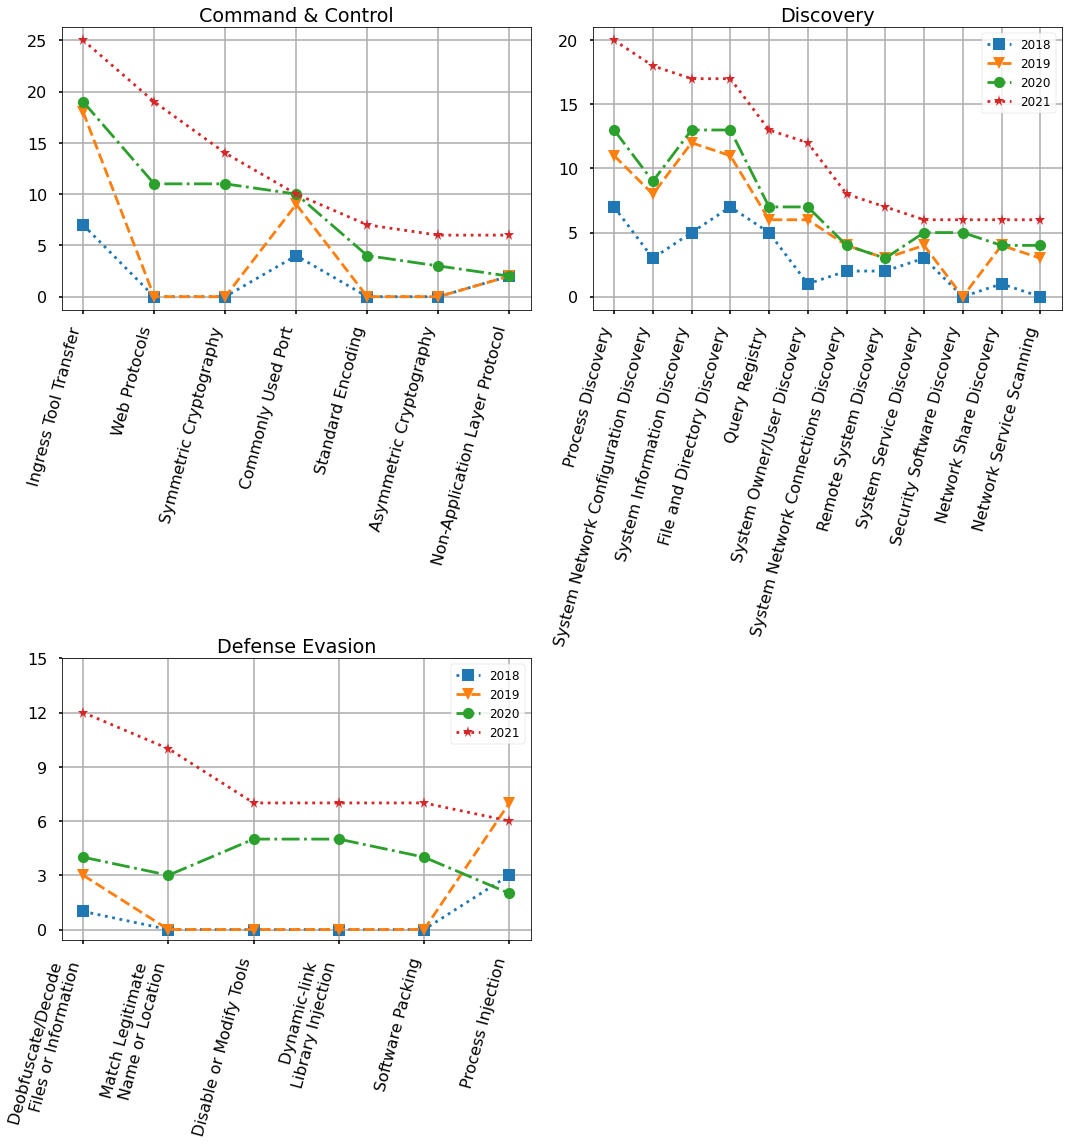

In [173]:
fh = 16    # figure height
fw = 15   # figure width

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, ax = plt.subplots(2,2, sharey=False, sharex=False)

    for column in styles:
        c2c[column].plot(ax=ax[0,0], style=styles[column], 
                         #linewidth=2,
                         title='Command & Control',
                         legend=False,
                         grid=True);
        
        ax[0,0].set_xticks(range(0,7))
        ax[0,0].set_xticklabels(c2c.index, rotation=75, ha='right') 
        ax[0,0].get_xaxis().get_label().set_visible(False)
        
        disc[column].plot(ax=ax[0,1], style=styles[column], 
                         #linewidth=2,
                         title='Discovery',
                         legend=True,
                         grid=True); 
        
        ax[0,1].set_xticks(range(0,12))
        ax[0,1].set_xticklabels(disc.index, rotation=75, ha='right')
        ax[0,1].get_xaxis().get_label().set_visible(False)
        ax[0,1].set_yticks([0,5,10,15,20])
        ax[0,1].legend(loc='upper right', fontsize=12)
        
        defn[column].plot(ax=ax[1,0], style=styles[column], 
                         #linewidth=2,
                         title='Defense Evasion',
                         legend=False,
                         grid=True);
        
        ax[1,0].set_xticks(range(0,6))
        ax[1,0].set_xticklabels(defn.index, rotation=75, ha='right') 
        ax[1,0].get_xaxis().get_label().set_visible(False)
        ax[1,0].set_yticks([0,3,6,9,12,15])
        ax[1,0].legend(loc='upper right', fontsize=12)
    

    fig.set_figheight(fh)
    fig.set_figwidth(fw)
    fig.set_facecolor('w')
    fig.delaxes(ax[1][1])

    fig.tight_layout();

# CnC and Discovery only

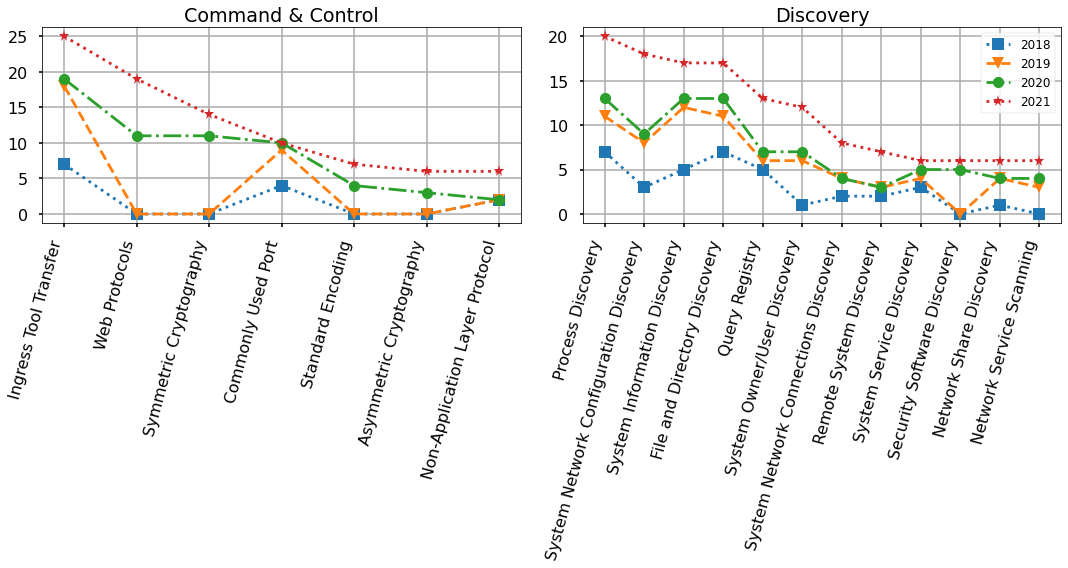

In [158]:
fh = 8    # figure height
fw = 15   # figure width

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, sharex=False)

    for column in styles:
        c2c[column].plot(ax=ax1, style=styles[column], 
                         #linewidth=2,
                         title='Command & Control',
                         legend=False,
                         grid=True);
        
        disc[column].plot(ax=ax2, style=styles[column], 
                         #linewidth=2,
                         title='Discovery',
                         legend=True,
                         grid=True); 
        
        ax1.set_xticks(range(0,7))
        ax1.set_xticklabels(c2c.index, rotation=75, ha='right') 
        ax1.get_xaxis().get_label().set_visible(False)
        
        ax2.set_xticks(range(0,12))
        ax2.set_xticklabels(disc.index, rotation=75, ha='right')
        ax2.get_xaxis().get_label().set_visible(False)
        ax2.set_yticks([0, 5,10,15,20])
        ax2.legend(loc='upper right', fontsize=12)
    
    #for line in ax.get_lines():
    #    if line.get_label() == '2021':
    #        line.set_linewidth(3)
fig.set_figheight(fh)
fig.set_figwidth(fw)
fig.set_facecolor('w')
    
fig.tight_layout();

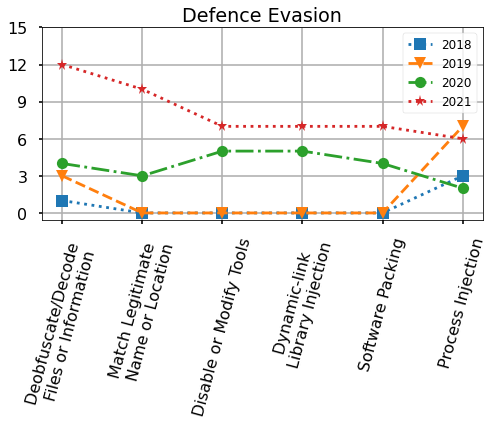

In [156]:
fh = 6    # figure height
fw = 7   # figure width

# Exclude columns with a zero count
#defn = defn.loc[:, defn.sum(axis=0) > 0]

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, ax1 = plt.subplots(1, sharey=False, sharex=False)

    for column in styles:        
        defn[column].plot(ax=ax1, style=styles[column], 
                         #linewidth=2,
                         title='Defence Evasion',
                         legend=True,
                         grid=True); 
        
        ax1.set_xticks(range(0,6))
        ax1.set_xticklabels(defn.index, rotation=75, ha='center') 
        ax1.get_xaxis().get_label().set_visible(False)
        ax1.set_yticks([0,3,6,9,12,15])
        ax1.legend(loc='upper right', fontsize=12)
    
    #for line in ax.get_lines():
    #    if line.get_label() == '2021':
    #        line.set_linewidth(3)
fig.set_figheight(fh)
fig.set_figwidth(fw)
fig.set_facecolor('w')
    
fig.tight_layout();